**This demo uses dataset of raw T1 structual MRI images. NKI dataset.**


- 10% for test, 90% for training.<p>
- final input dimension: (67,67,67), pixdim = (4,4,4).<p>
- no preprocess    
- no minmax, no mean value subtracted, no std value divided.
- use ./data_npy/origin/ to generate .tfrec    


In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys
sys.path.append('../..')
from dev_tools.my_tools import *
from dev_tools.model_tools import *

# The raw image

## Some images looks like this:

0.0
7.7914143
0.0


(array([2.50198e+05, 1.55630e+04, 4.08200e+03, 1.15600e+03, 4.09000e+02,
        1.47000e+02, 4.50000e+01, 1.90000e+01, 1.10000e+01, 3.00000e+00]),
 array([0.       , 0.7791414, 1.5582829, 2.3374243, 3.1165657, 3.8957071,
        4.6748486, 5.45399  , 6.2331314, 7.012273 , 7.7914143],
       dtype=float32),
 <a list of 10 Patch objects>)

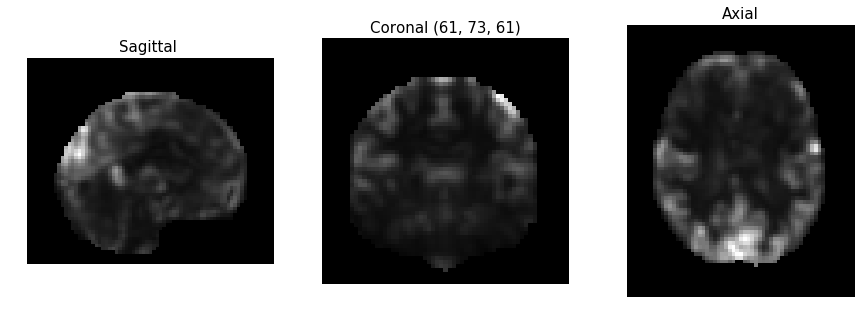

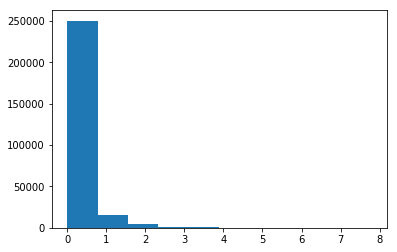

In [4]:
npy_img = np.load('/media/woody/Elements/Steve_age_data/ALFF_FunRawARWS/ALFFMap_sub-A00008326.npy')
print2d(npy_img)
plt.figure()
plt.hist(npy_img.reshape(-1))

## It goes through the resampling and padding process

0.0
7.7914143
0.0


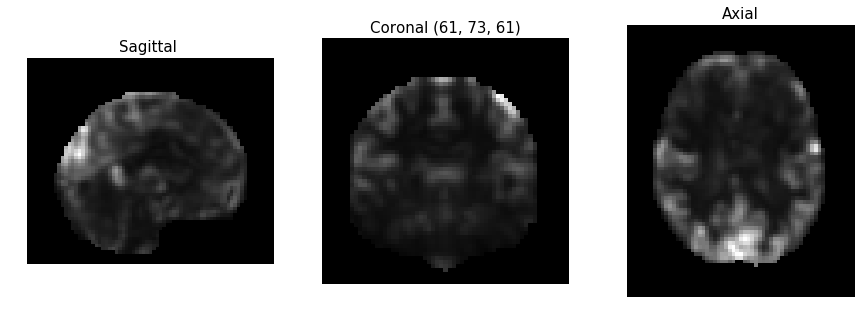

In [13]:
crop_padded_img = np.load('./data_npy/origin/8326.npy')
print2d(crop_padded_img)

## Finally, the images fed into the model look like this:

0.0
6.370328
-2.0704155


(array([3.89000e+02, 1.01940e+04, 2.53957e+05, 5.63300e+03, 1.03900e+03,
        2.93000e+02, 9.30000e+01, 2.10000e+01, 1.10000e+01, 3.00000e+00]),
 array([-2.0704155 , -1.2263411 , -0.38226682,  0.46180755,  1.3058819 ,
         2.1499562 ,  2.9940305 ,  3.838105  ,  4.6821795 ,  5.5262537 ,
         6.370328  ], dtype=float32),
 <a list of 10 Patch objects>)

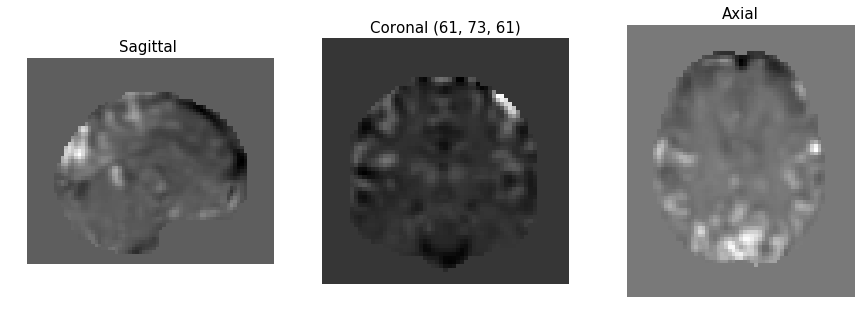

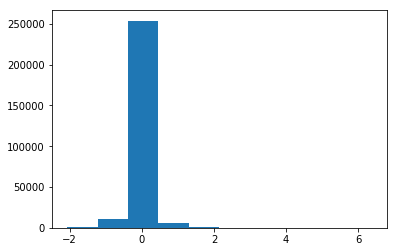

In [14]:
final_img = np.load('./data_npy/mean_subtracted/8326.npy')
print2d(final_img)
plt.figure()
plt.hist(final_img.reshape(-1))

# Training and test results

- The validation uses the test dataset.

- Our model uses 3D-CNN with dropout, batch normalization and L2 regularization.
- Target model uses 3D-CNN with dropout.

The training process of Woody's model


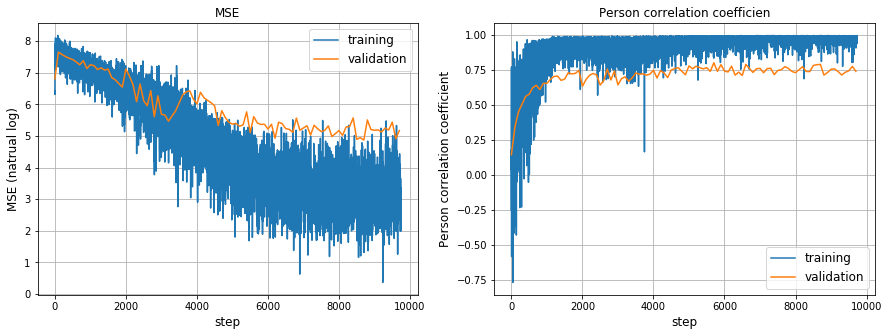

In [15]:
draw_training_proc('./img/training_return_list_woody.npy')
print('The training process of Woody\'s model')

The training process of Zach's modle


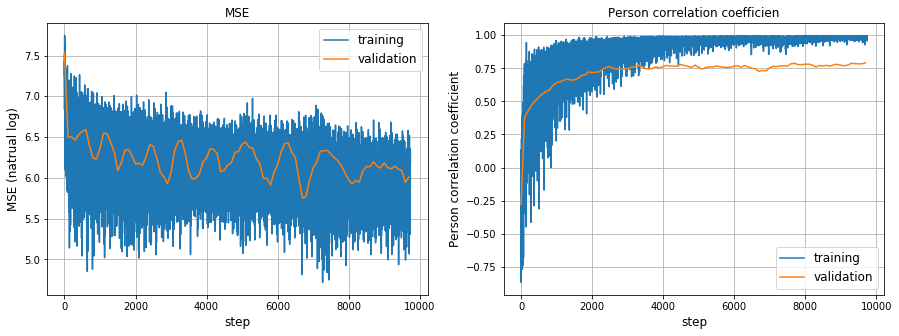

In [16]:
draw_training_proc('./img/training_return_list_zach.npy')
print('The training process of Zach\'s modle')

## Let's check the correlation between the predicted age and the chronological age.

Model woody, best MSE


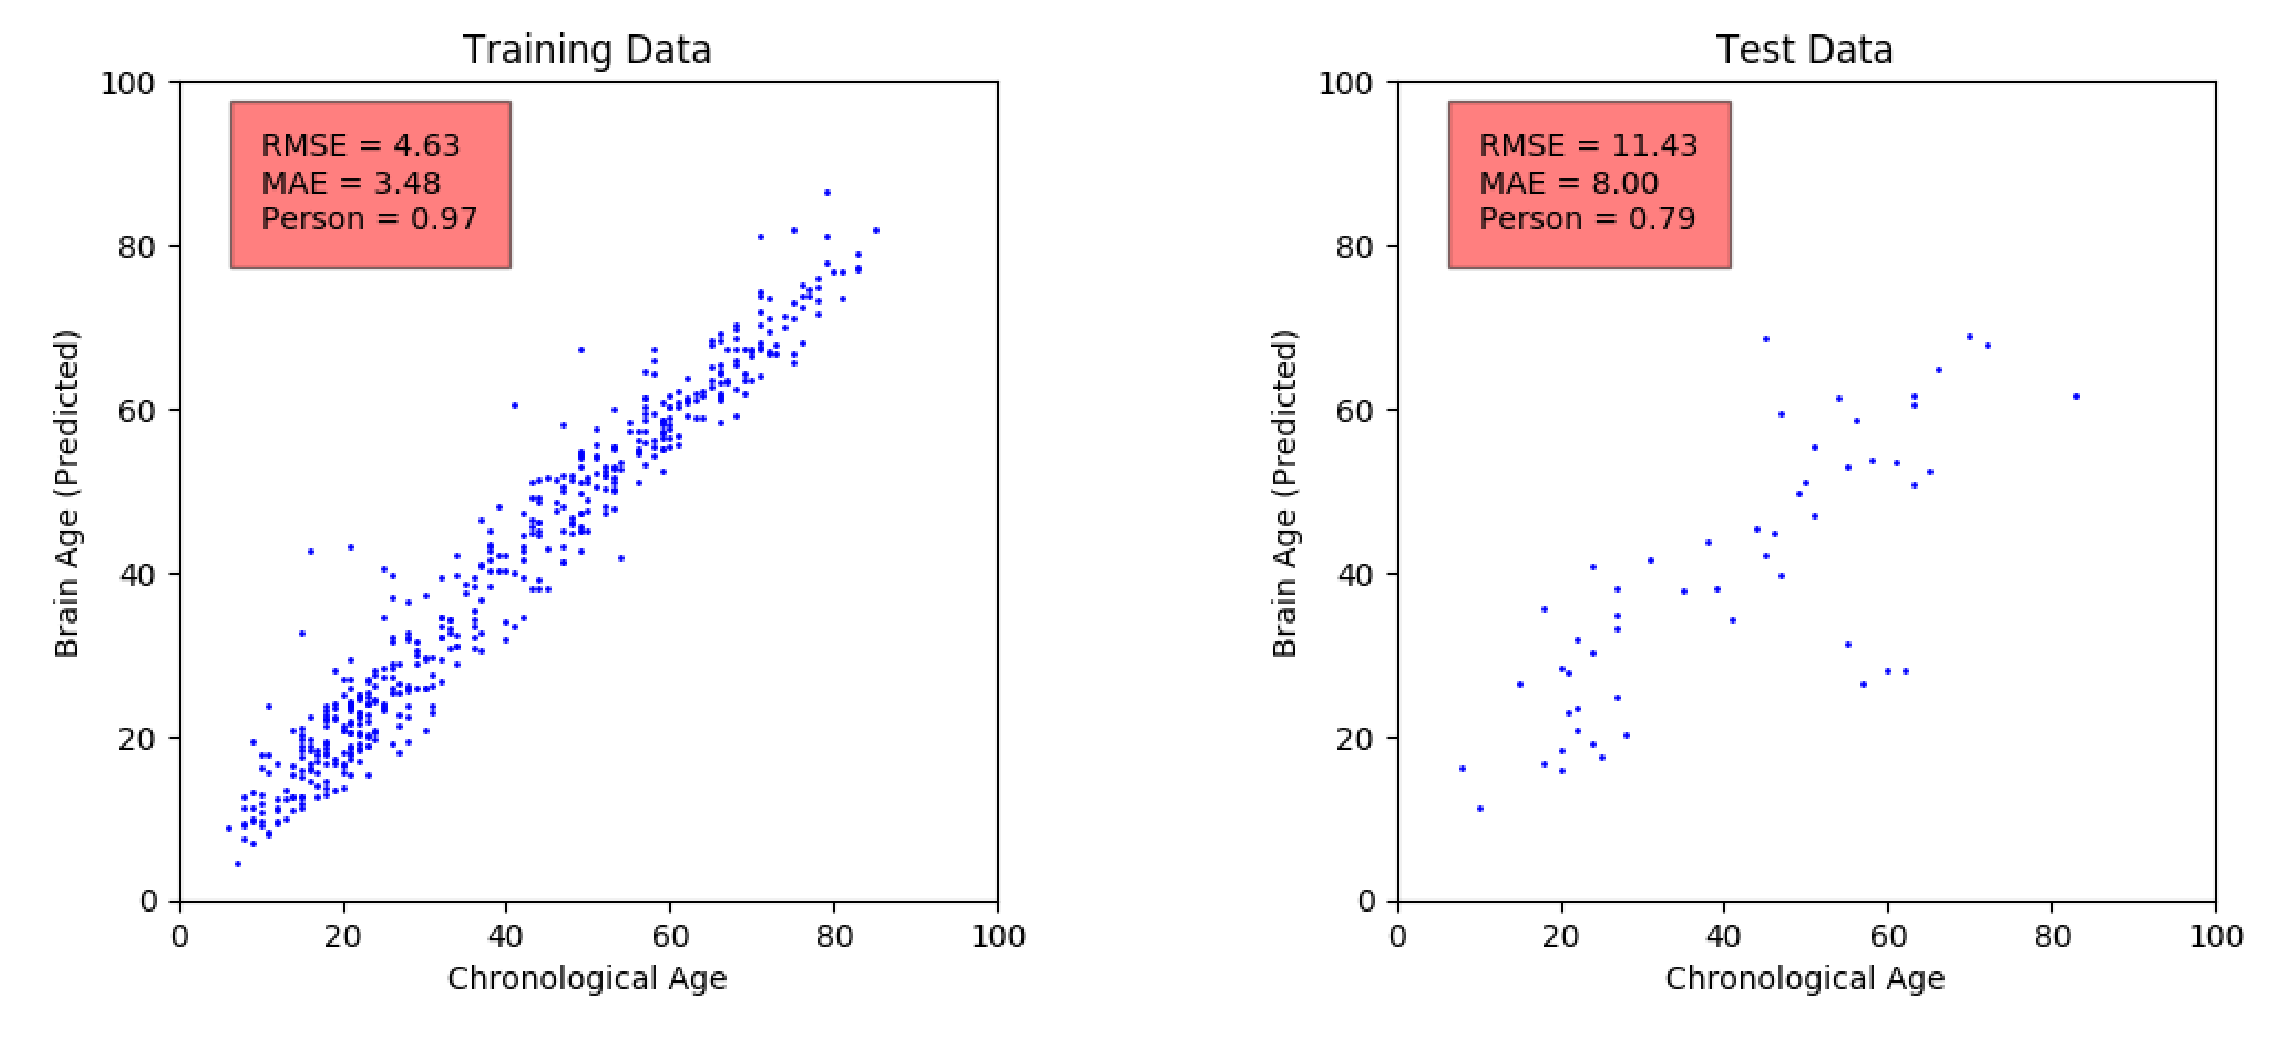

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
ax1.imshow(plt.imread('./img/training_corr_mse_woody.pdf.png'))
ax1.axis('off')
# ax1.set_title('Training dataset',fontsize=40)
ax2.imshow(plt.imread('./img/test_corr_mse_woody.pdf.png'))
ax2.axis('off')
# ax2.set_title('Test dataset',fontsize=40)
print('Model woody, best MSE')

Model woody, best Person


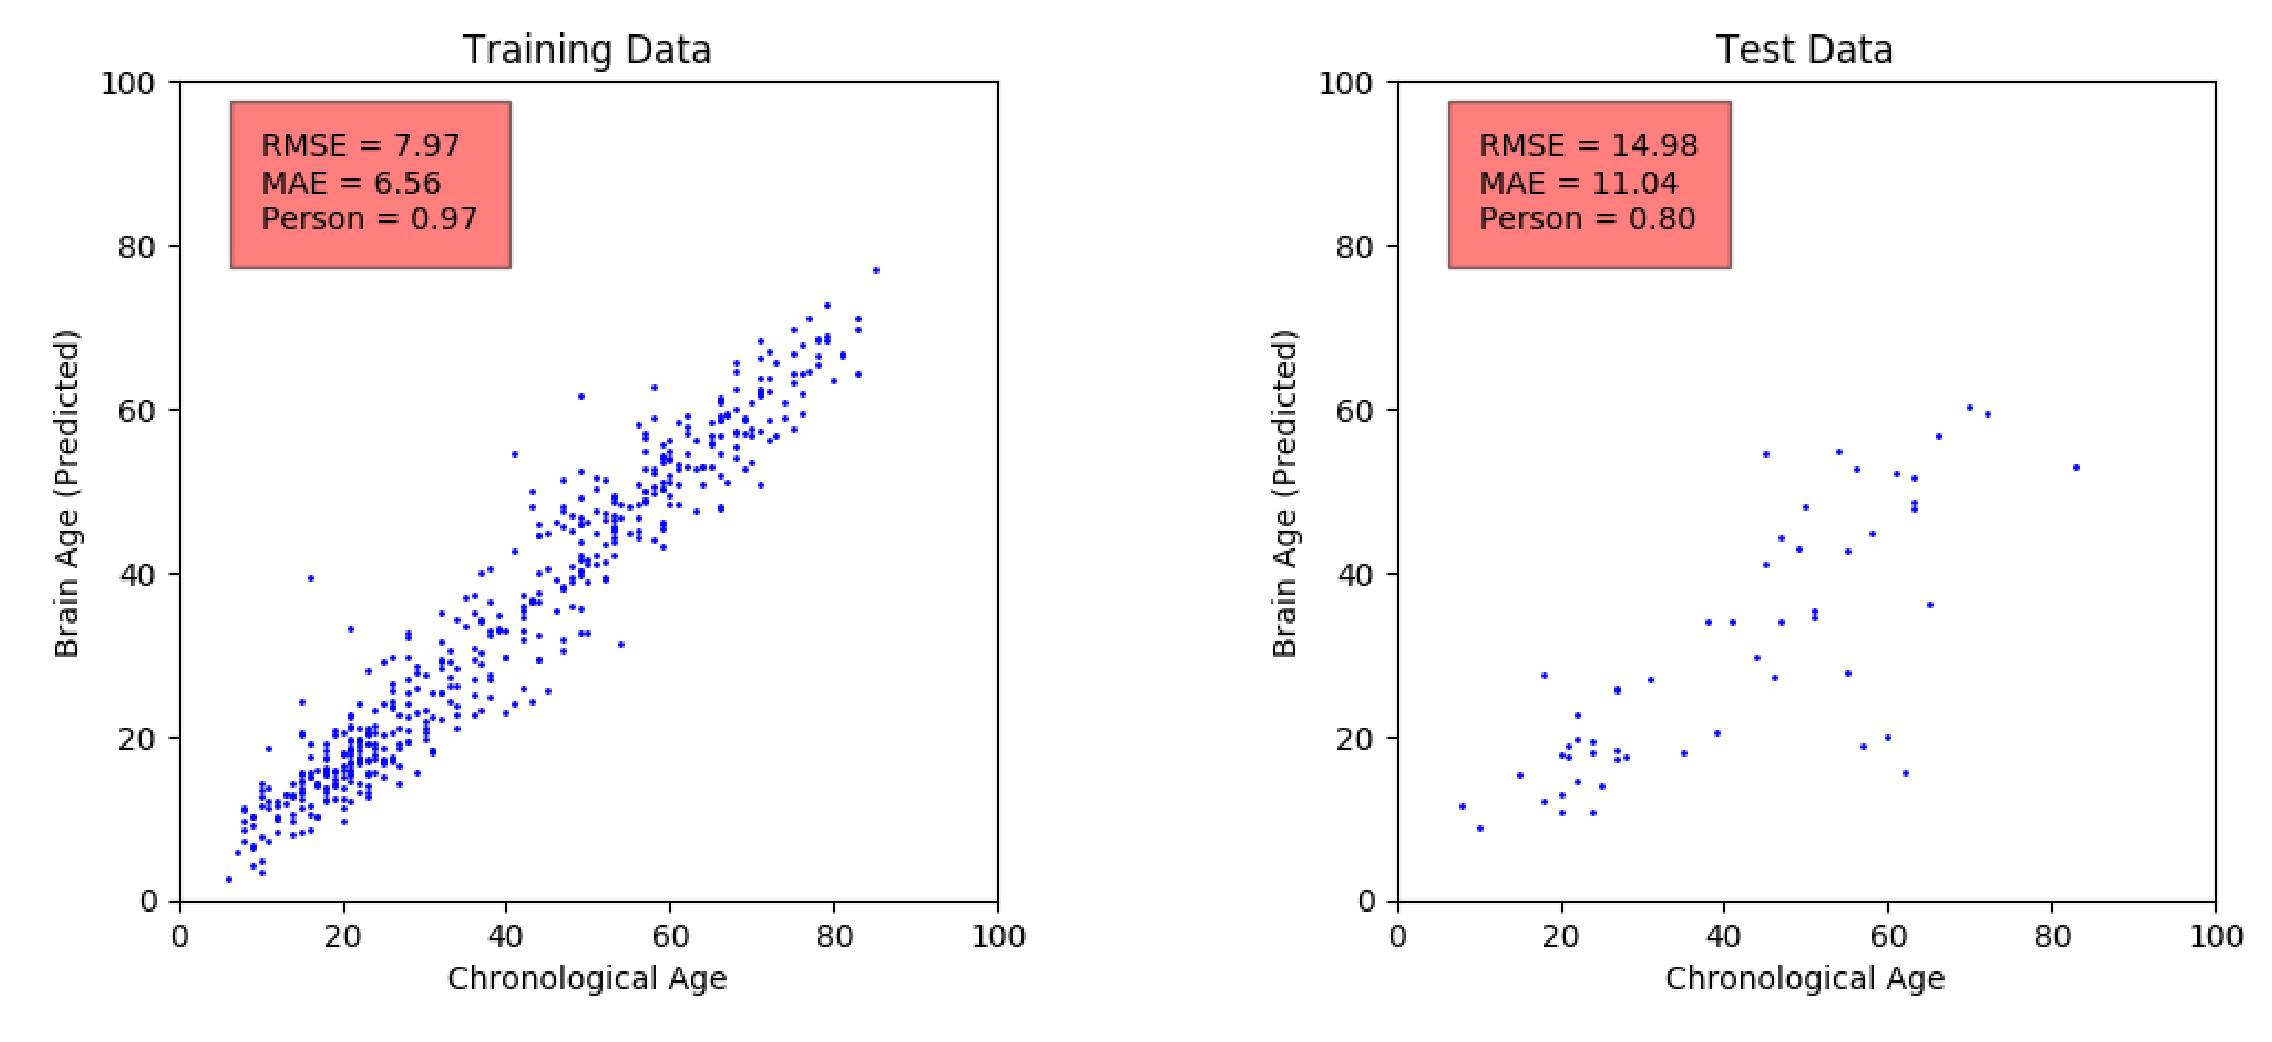

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
ax1.imshow(plt.imread('./img/training_corr_person_woody.pdf.png'))
ax1.axis('off')
# ax1.set_title('Training dataset',fontsize=40)
ax2.imshow(plt.imread('./img/test_corr_person_woody.pdf.png'))
ax2.axis('off')
# ax2.set_title('Test dataset',fontsize=40)
print('Model woody, best Person')

Model zach, best MSE


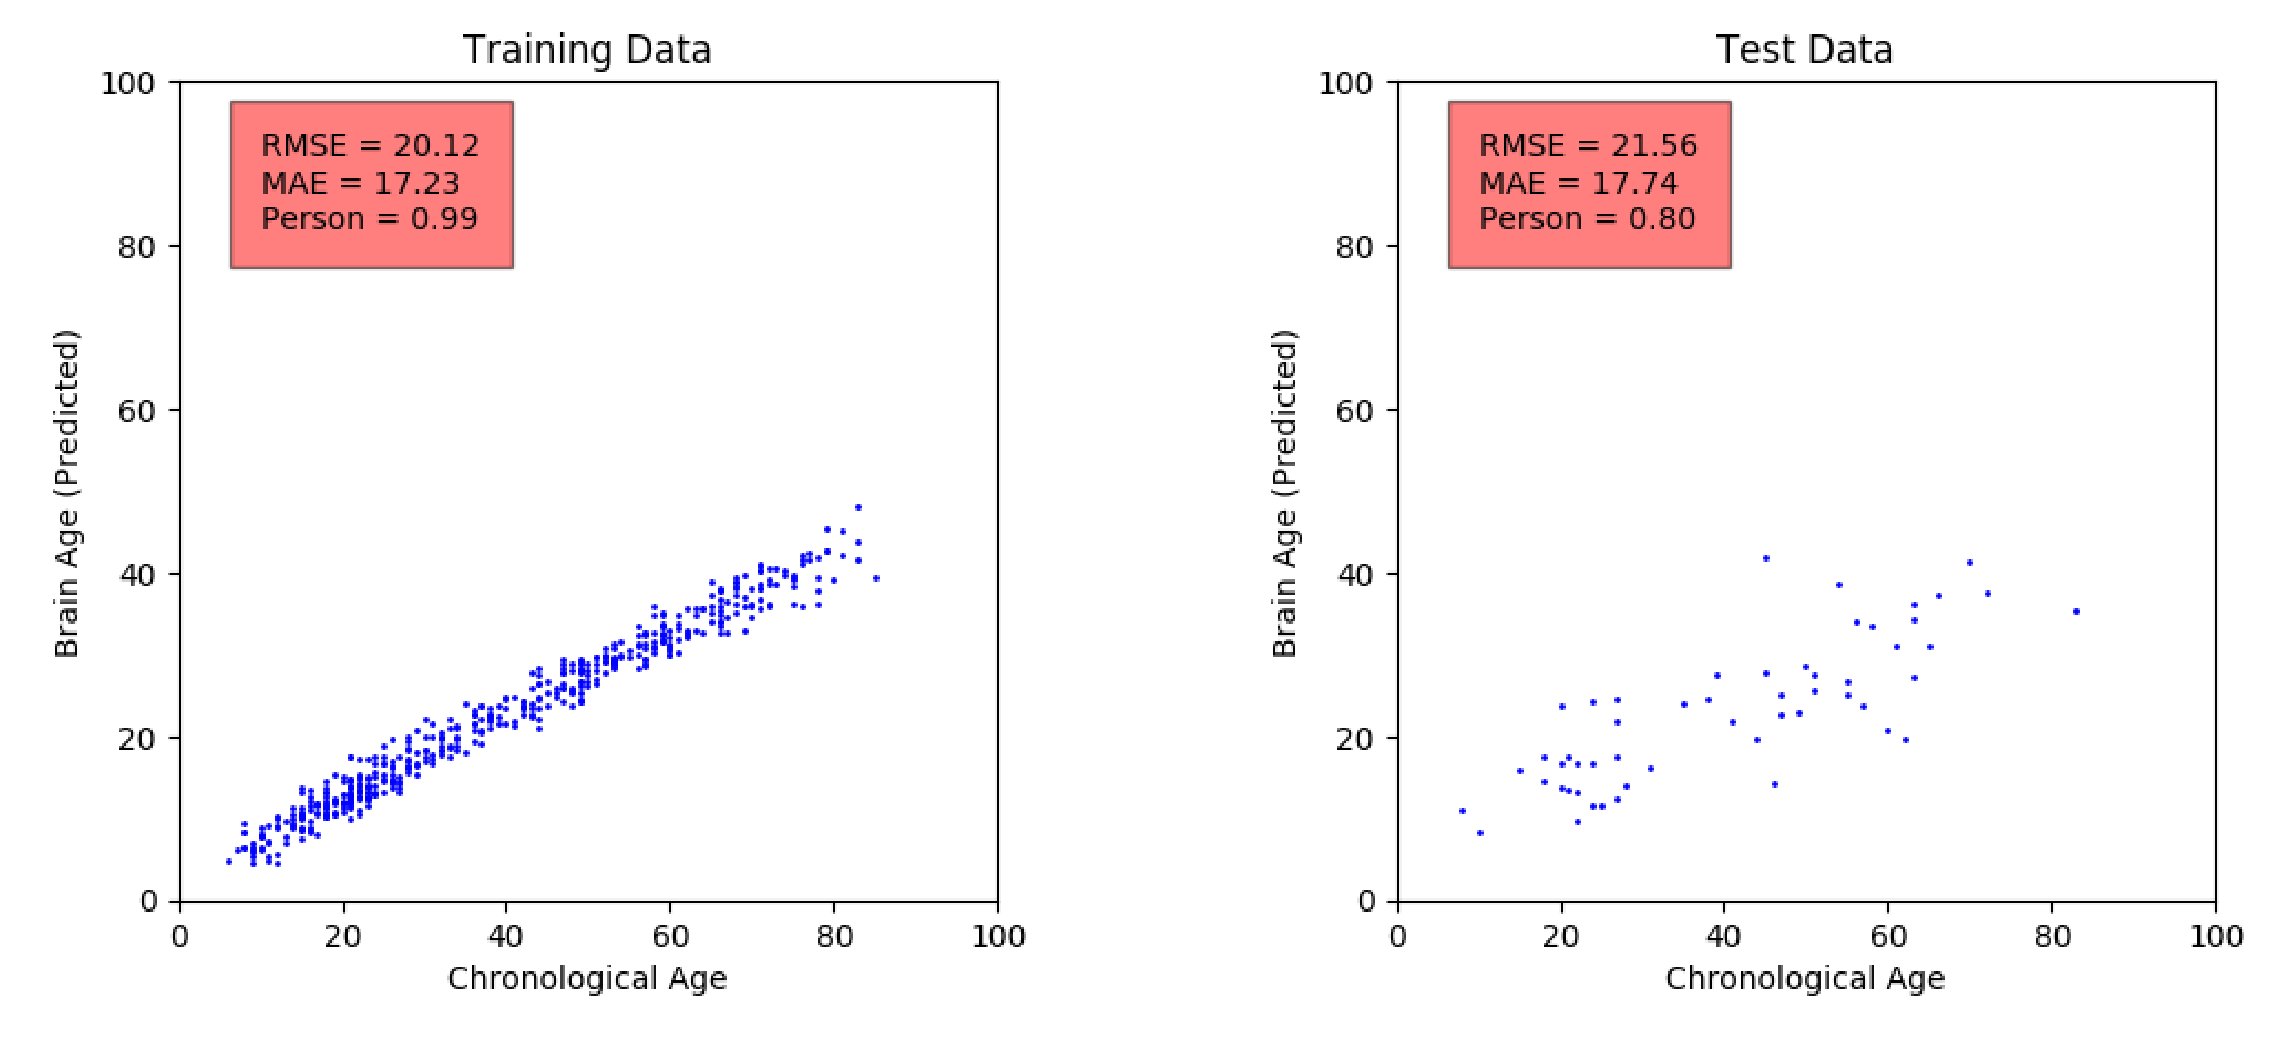

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
ax1.imshow(plt.imread('./img/training_corr_mse_zach.pdf.png'))
ax1.axis('off')
# ax1.set_title('Training dataset',fontsize=40)
ax2.imshow(plt.imread('./img/test_corr_mse_zach.pdf.png'))
ax2.axis('off')
# ax2.set_title('Test dataset',fontsize=40)
print('Model zach, best MSE')

Model zach, best Person


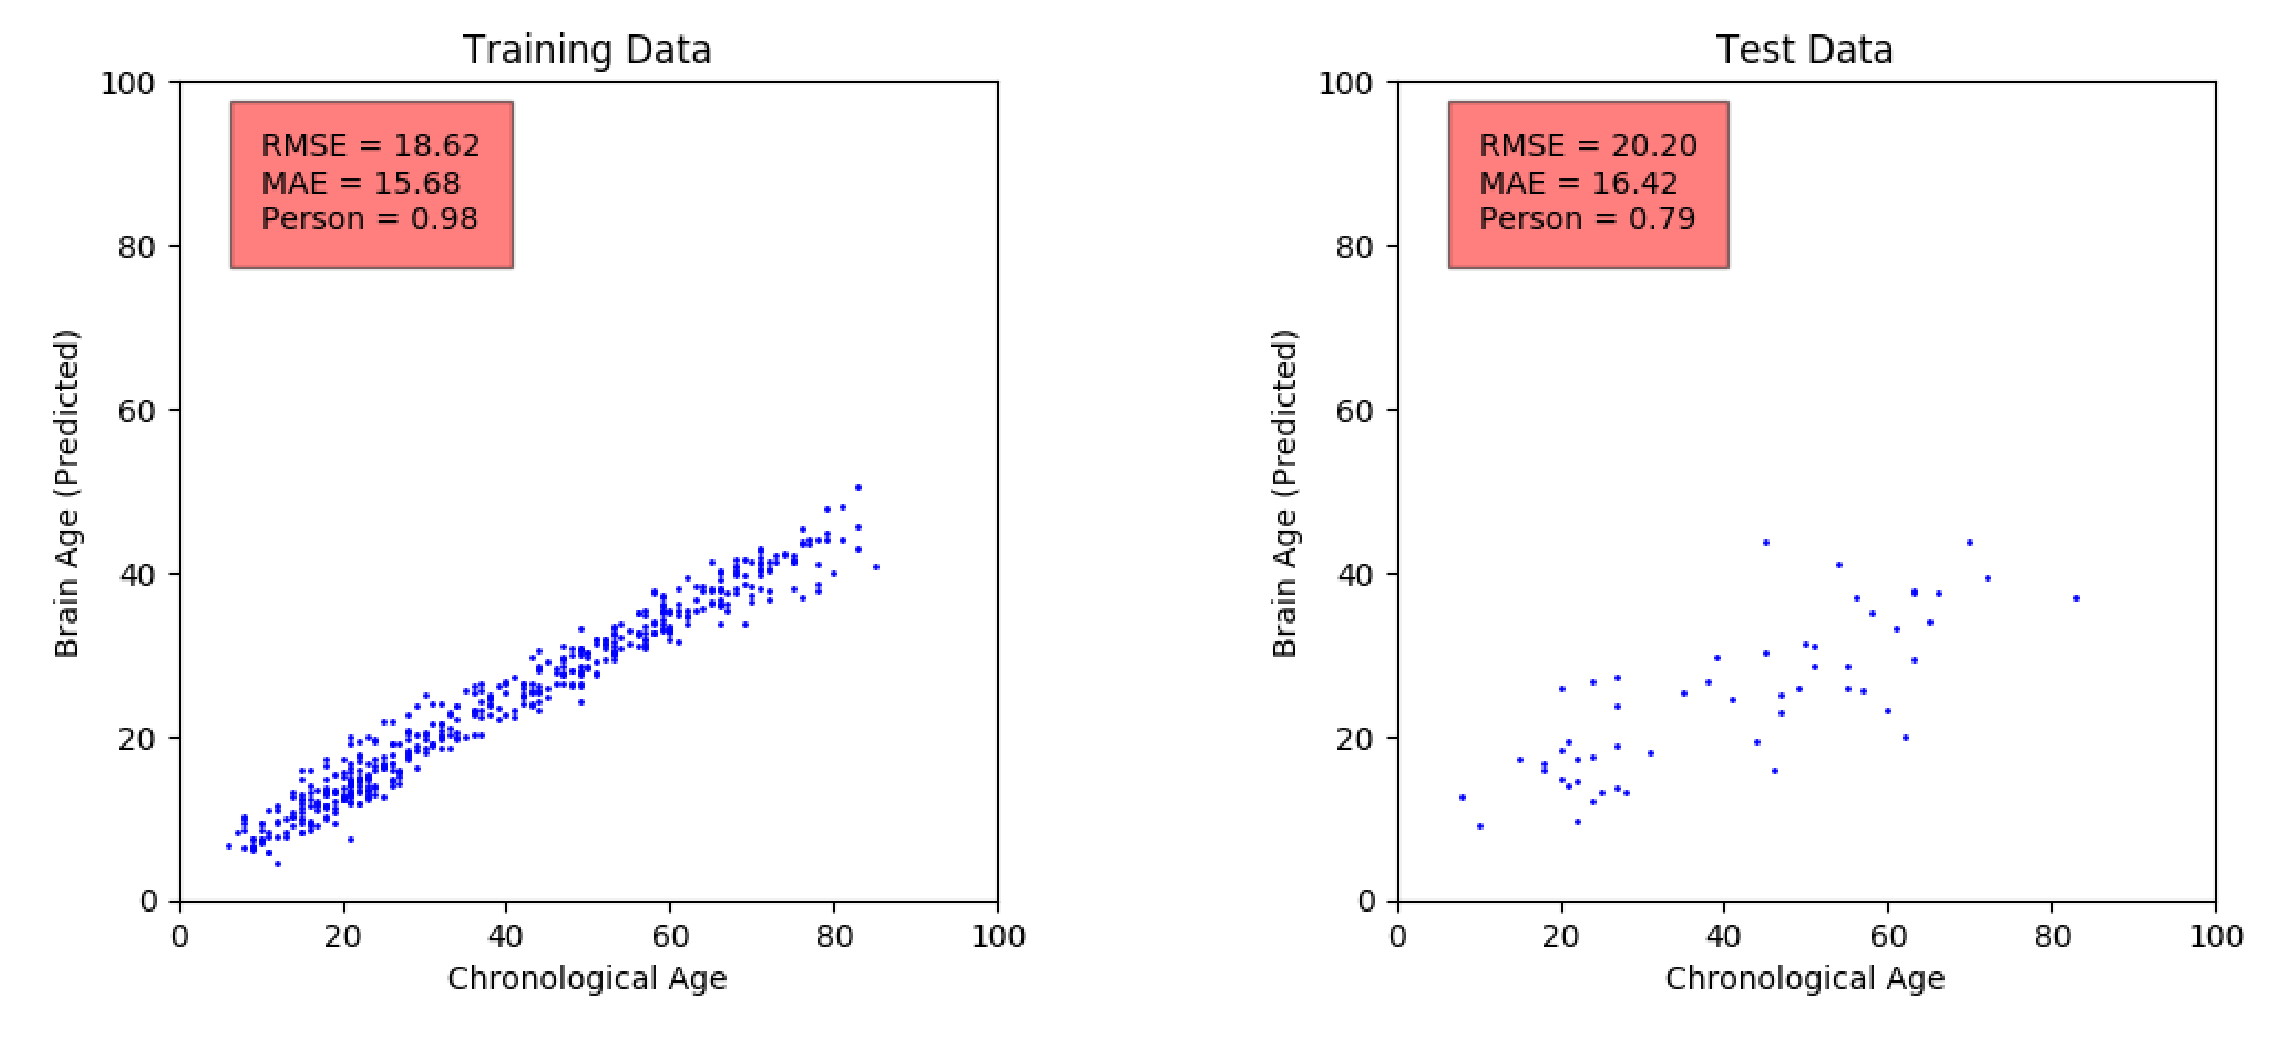

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
ax1.imshow(plt.imread('./img/training_corr_person_zach.pdf.png'))
ax1.axis('off')
# ax1.set_title('Training dataset',fontsize=40)
ax2.imshow(plt.imread('./img/test_corr_person_zach.pdf.png'))
ax2.axis('off')
# ax2.set_title('Test dataset',fontsize=40)
print('Model zach, best Person')

# Conclusion
The mean absolute error may be better.


# Appendix:
Predicted age of some test subjects.